In [2]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [25]:
import wordcloud

In [5]:
#nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [6]:
index = ['1941-Roosevelt','1961-Kennedy','1973-Nixon']
speech=pd.DataFrame({'text':[inaugural.raw('1941-Roosevelt.txt'),inaugural.raw('1961-Kennedy.txt'),inaugural.raw('1973-Nixon.txt')]},index=index)

In [7]:
speech

,text
1941-Roosevelt,On each national day of inauguration since 178...
1961-Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
1973-Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


In [9]:
speech['char_count'] = speech['text'].str.len() ## this also includes spaces
speech

,text,char_count
1941-Roosevelt,On each national day of inauguration since 178...,7571
1961-Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618
1973-Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991


In [10]:
speech['word_count'] = speech['text'].apply(lambda x: len(str(x).split(" ")))
speech

,text,char_count,word_count
1941-Roosevelt,On each national day of inauguration since 178...,7571,1323
1961-Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618,1364
1973-Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991,1769


In [11]:
from nltk.tokenize import sent_tokenize
speech['sents_count'] = speech['text'].apply(lambda x: len(sent_tokenize(x)))
speech

,text,char_count,word_count,sents_count
1941-Roosevelt,On each national day of inauguration since 178...,7571,1323,68
1961-Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618,1364,52
1973-Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991,1769,68


In [12]:
# Lower case conversion
speech['text'] = speech['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
speech['text']

1941-Roosevelt    on each national day of inauguration since 178...
1961-Kennedy      vice president johnson, mr. speaker, mr. chief...
1973-Nixon        mr. vice president, mr. speaker, mr. chief jus...
Name: text, dtype: object

In [13]:
# Remove punctuation
speech['text'] = speech['text'].str.replace('[^\w\s]','')
speech['text']

1941-Roosevelt    on each national day of inauguration since 178...
1961-Kennedy      vice president johnson mr speaker mr chief jus...
1973-Nixon        mr vice president mr speaker mr chief justice ...
Name: text, dtype: object

In [17]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
add_to_stop_words = ['mr','on','it','the','in','to']
stop_words.extend(add_to_stop_words)
stop_words=set(stop_words)

In [18]:
speech['text'] = speech['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
speech

,text,char_count,word_count,sents_count
1941-Roosevelt,national day inauguration since 1789 people re...,7571,1323,68
1961-Kennedy,vice president johnson speaker chief justice p...,7618,1364,52
1973-Nixon,vice president speaker chief justice senator c...,9991,1769,68


In [160]:
freq = pd.Series(' '.join(inaugural_speech.iloc[0:1,0]).split()).value_counts()[:15]
freq
#inaugural_speech.iloc[0:1,0] 
# 1941-Roosevelt

nation       11
know         10
spirit        9
democracy     9
life          8
us            8
people        7
america       7
years         6
freedom       6
human         5
mind          5
speaks        5
body          4
states        4
dtype: int64

In [161]:
freq = pd.Series(' '.join(inaugural_speech.iloc[1:2,0]).split()).value_counts()[:15]
freq
#inaugural_speech.iloc[1:2,0]
# 1961-Kennedy

us          12
sides        8
world        8
pledge       7
new          7
shall        5
free         5
ask          5
nations      5
power        5
citizens     5
help         4
country      4
peace        4
hope         4
dtype: int64

In [162]:
freq = pd.Series(' '.join(inaugural_speech.iloc[2:3,0]).split()).value_counts()[:15]
freq
#inaugural_speech.iloc[1:2,0]
# 1973-Nixon

us                26
peace             19
world             16
new               15
america           13
responsibility    11
government        10
home               9
great              9
nation             8
americas           8
abroad             8
years              7
shall              7
better             7
dtype: int64

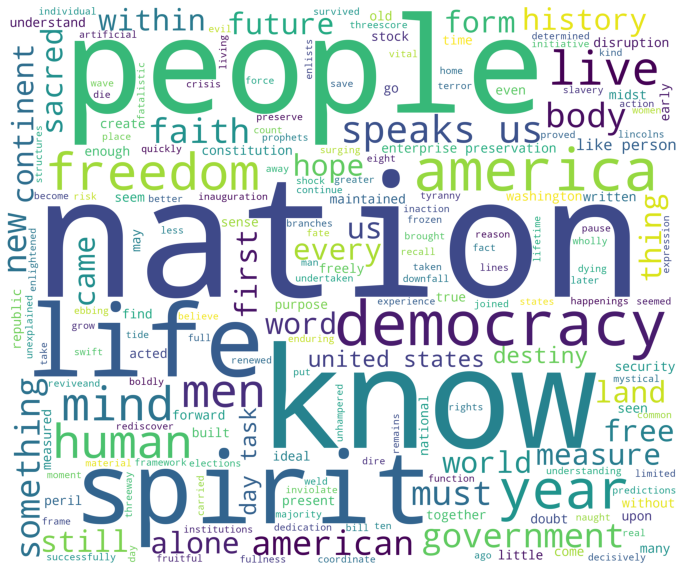

In [28]:
from wordcloud import WordCloud,STOPWORDS
#new_df=inaugural_speech.iloc[0:1,0]
words = ' '.join(speech.iloc[0:1,0])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

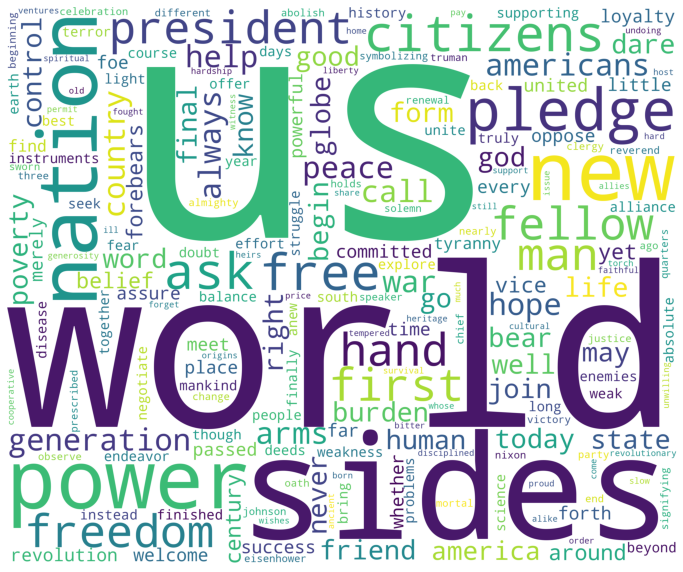

In [30]:
words = ' '.join(speech.iloc[1:2,0])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

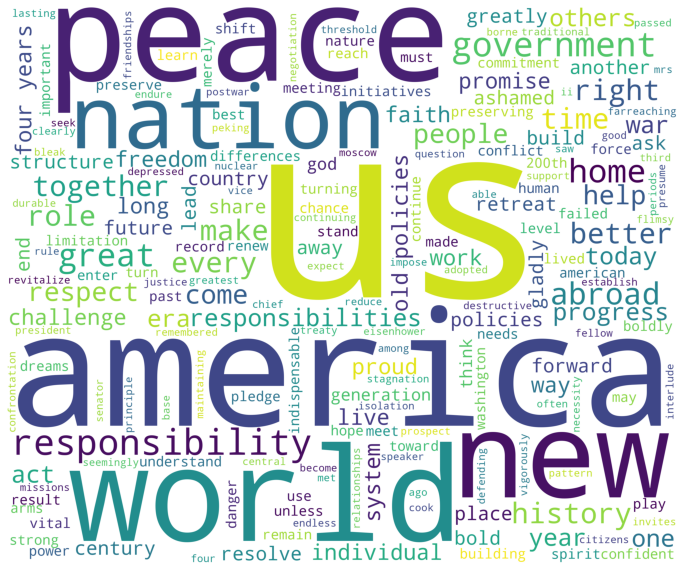

In [32]:
words = ' '.join(speech.iloc[2:3,0])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()